# `add_lat_lon_gridlines`

This notebook is a simple example of the GeoCAT-viz function [`add_lat_lon_gridlines`](../generated/geocat.viz.util.add_lat_lon_gridlines.html).

In [1]:
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cmaps

import geocat.viz as gv
import geocat.datafiles as gdf

In [2]:
# Read in data:
nlat = 293
nlon = 343

# Read in binary topography file using big endian float data type (>f)
topo = np.fromfile(gdf.get("binary_files/topo.bin"), dtype=np.dtype('>f'))
# Reshape topography array into 2-D array
topo = np.reshape(topo, (nlat, nlon))

# Read in binary latitude/longitude file using big endian float data type (>f)
latlon = np.fromfile(gdf.get("binary_files/latlon.bin"), dtype=np.dtype('>f'))
latlon = np.reshape(latlon, (2, nlat, nlon))
lat = latlon[0]
lon = latlon[1]

/Users/jkent/miniconda3/envs/geocat_viz_build/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/jkent/miniconda3/envs/geocat_viz_build/lib/python3.10/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/Users/jkent/miniconda3/envs/geocat_viz_build/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(


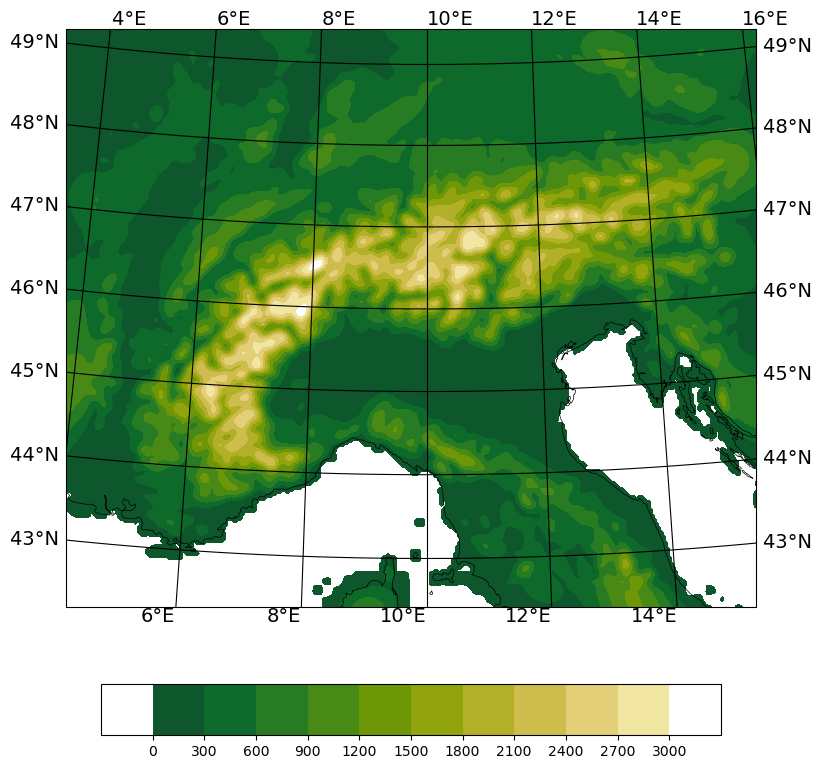

In [3]:
# Plot:

# Generate figure (set its size (width, height) in inches)
fig = plt.figure(figsize=(10, 10))

# Create cartopy axes and add coastlines
ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=10))
ax.coastlines(linewidths=0.5)

# Set extent to show particular area of the map ranging from 4.25E to 15.25E
# and 42.25N to 49.25N
ax.set_extent([4.25, 15.25, 42.25, 49.25], ccrs.PlateCarree())

# Create colormap by choosing colors from existing colormap
# The brightness of the colors in cmocean_speed increase linearly. This
# makes the colormap easier to interpret for those with vision impairments
cmap = cmaps.cmocean_speed

# Specify the indices of the desired colors
index = [0, 200, 180, 160, 140, 120, 100, 80, 60, 40, 20, 0]
color_list = [cmap[i].colors for i in index]

# make the starting color and end color white
color_list[0] = [1, 1, 1]  # [red, green, blue] values range from 0 to 1
color_list[-1] = [1, 1, 1]

# Plot contour data, use the transform keyword to specify that the data is
# stored as rectangular lon,lat coordinates
contour = ax.contourf(lon,
                      lat,
                      topo,
                      transform=ccrs.PlateCarree(),
                      levels=np.arange(-300, 3301, 300),
                      extend='neither',
                      colors=color_list)

# Create colorbar
plt.colorbar(contour,
             ax=ax,
             ticks=np.arange(0, 3001, 300),
             orientation='horizontal',
             aspect=12,
             pad=0.1,
             shrink=0.8)

# Use geocat-viz utility function to add gridlines to the map
gl = gv.add_lat_lon_gridlines(
    ax,
    color='black',
    labelsize=14,
    xlocator=np.arange(4, 18, 2),  # longitudes for gridlines
    ylocator=np.arange(43, 50))  # latitudes for gridlines

# Show the plot
plt.show()